In [ ]:
# importer les bibleothiques nécessaires

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pip install xlrd

In [11]:
#Panda version : 
print(pd.__version__)

1.1.5


In [12]:
#lire les données à partir du chemin

In [13]:
path=r'C:\Users\Hamza\Desktop\Master_Sidi_S3\Maching Learning & Data Mining\projet_data_mining\data\student-por.csv'

In [14]:
data=pd.read_csv(path)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [16]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [17]:
# Getting the set of columns 
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [22]:
def create_average_column():
    columns = ['G1', 'G2', 'G3']
    data['annual_grades_avg'] = data[columns].mean(
        axis=1)

In [23]:
create_average_column()

In [26]:
def five_level_classification():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 9.5), (9.5, 11.5), (11.5, 13.5), (13.5, 15.5), (15.5, 20)], closed='right')

    levels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']

    new_column = 'annual_grades_evaluation'
    data[new_column] = np.array(levels)[
        pd.cut(data['annual_grades_avg'], bins=bins).cat.codes]

In [27]:
five_level_classification()



In [28]:
print(f'data frame shape: {data.shape}')


data frame shape: (649, 35)


In [30]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg,annual_grades_evaluation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,sufficient
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,satisfactory


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   school                    649 non-null    object 
 1   sex                       649 non-null    object 
 2   age                       649 non-null    int64  
 3   address                   649 non-null    object 
 4   famsize                   649 non-null    object 
 5   Pstatus                   649 non-null    object 
 6   Medu                      649 non-null    int64  
 7   Fedu                      649 non-null    int64  
 8   Mjob                      649 non-null    object 
 9   Fjob                      649 non-null    object 
 10  reason                    649 non-null    object 
 11  guardian                  649 non-null    object 
 12  traveltime                649 non-null    int64  
 13  studytime                 649 non-null    int64  
 14  failures  

In [32]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667


In [33]:
sns.set_theme(style="darkgrid")

In [47]:
def plot_corr_map(data, **kwargs):

    _, ax = plt.subplots(figsize=(35, 35))
    sns.heatmap(data=data.corr(), ax=ax, **kwargs)
    ax.set_title('Correlation Heatmap')

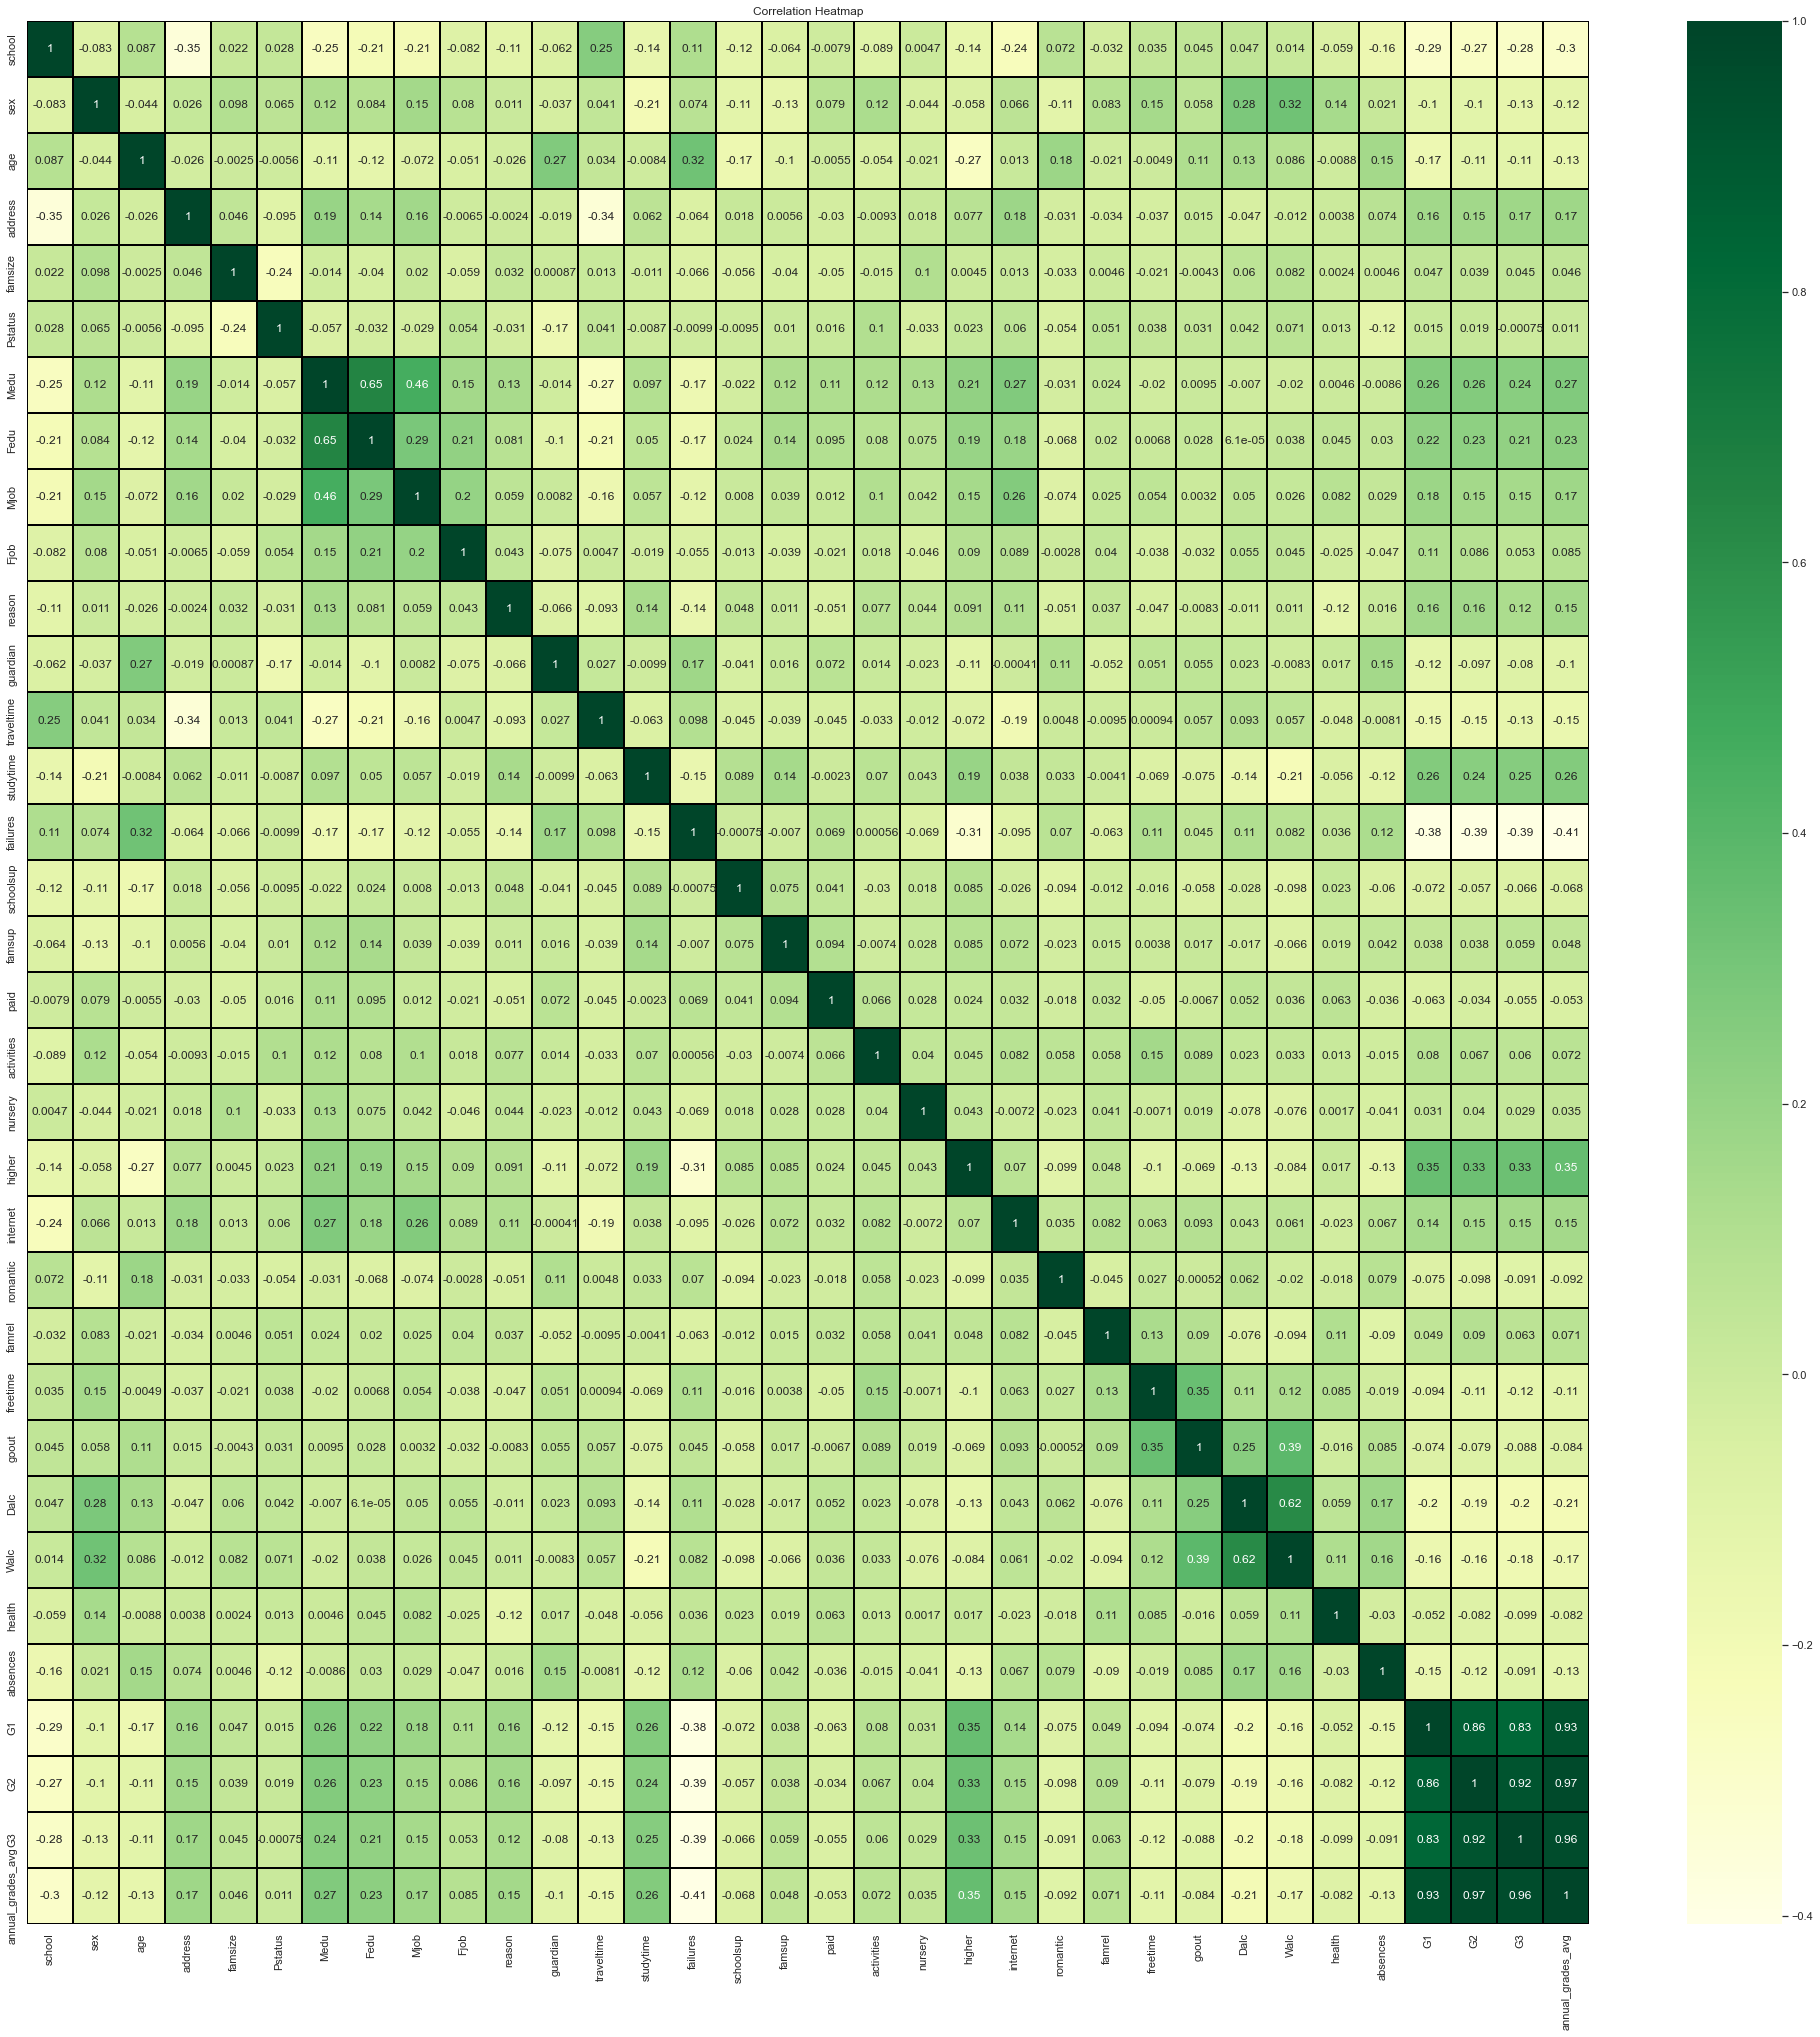

In [48]:
params = {'annot': True, 'fmt': '.2g', 'cmap': 'YlGn',
          'linewidths': 1, 'linecolor': 'black'}

# We need to encode the string nominal columns to numbers
encoded_df = data.iloc[:, :-1].copy()
columns = encoded_df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
encoded_df[columns] = ordinal_encoder.fit_transform(encoded_df[columns])

plot_corr_map(encoded_df, **params)

In [49]:
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=data,
                      x='annual_grades_evaluation', hue=column, ax=ax[0])
        sns.countplot(data=data, x=column, ax=ax[1])

        sns.boxplot(data=data, x=column,
                    y='annual_grades_avg', ax=ax[2])

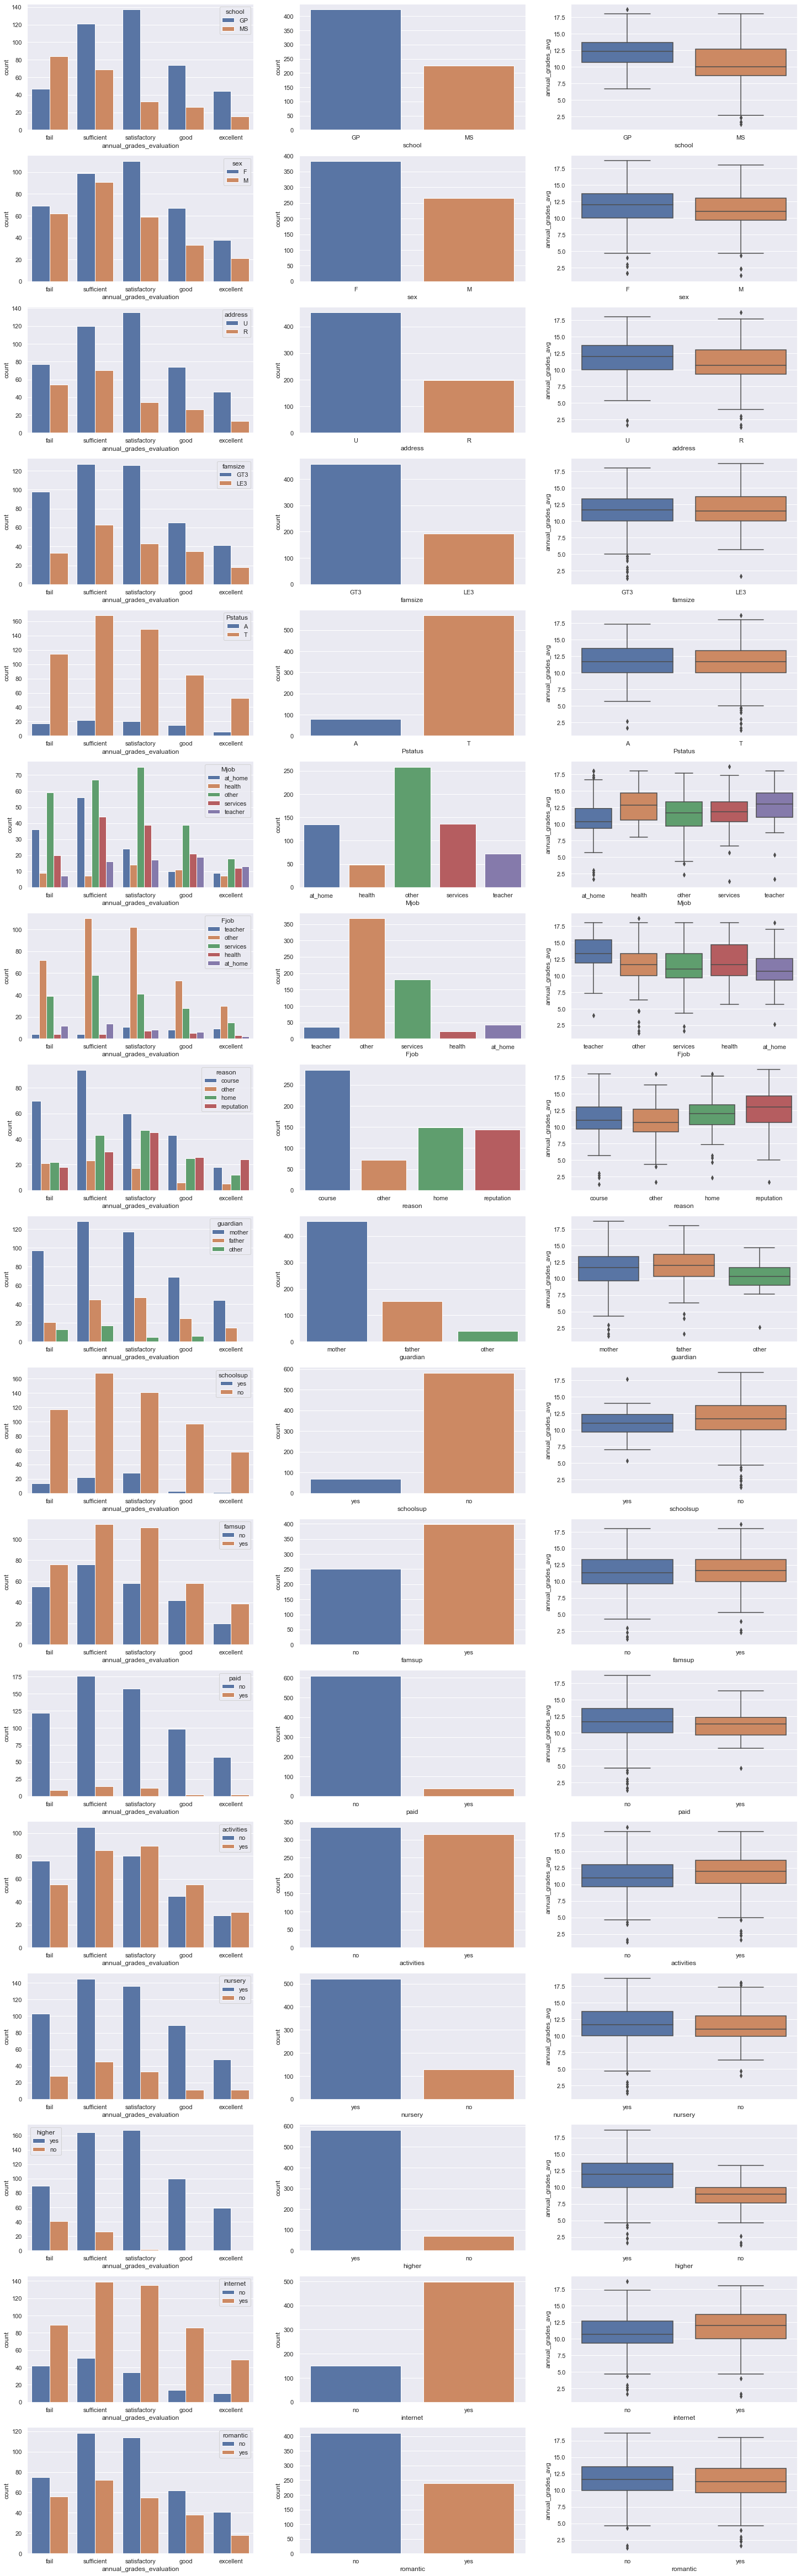

In [50]:
columns = data.select_dtypes(include='object')
columns = columns.drop('annual_grades_evaluation', axis=1)
plot_categorical_insight(columns)

In [51]:
def plot_grades_to_self():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    sns.countplot(data=data,
                  x='annual_grades_evaluation', ax=axes[0])

    sns.boxplot(data=data,
                x='annual_grades_evaluation', y='annual_grades_avg', ax=axes[1])

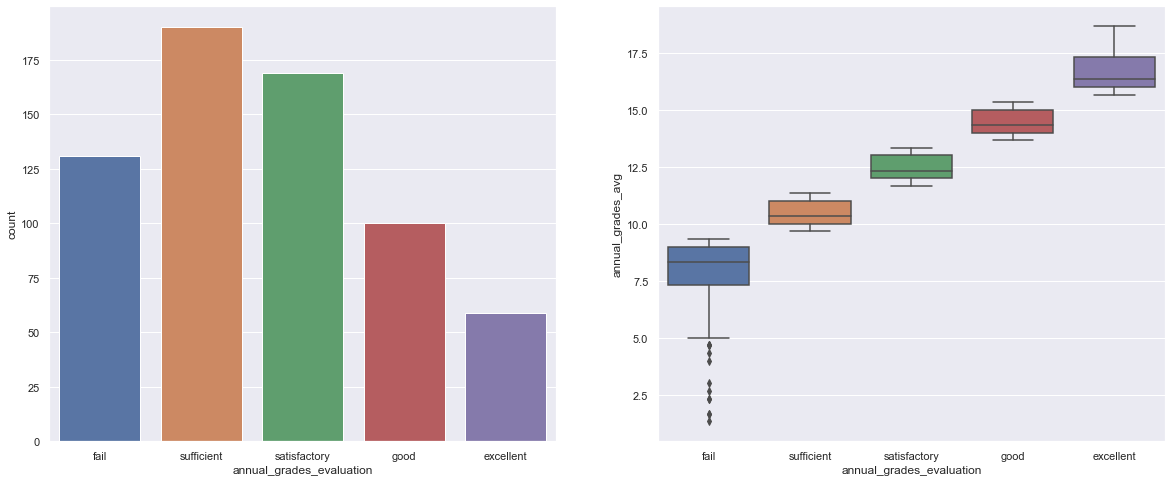

In [52]:
plot_grades_to_self()

In [58]:
def plot_non_categorical_insight(non_categorical_columns):

    nrows, ncols = non_categorical_columns.shape[1], 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))

    for idx, column in enumerate(non_categorical_columns):
        ax = axes[idx]

        sns.scatterplot(data=data, x=column,
                        y='annual_grades_avg', ax=ax[0], hue='annual_grades_evaluation')
        ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
                     ncol=5, fancybox=True, shadow=True)

        sns.boxplot(data=data, x=column,
                    y='annual_grades_avg', ax=ax[1])

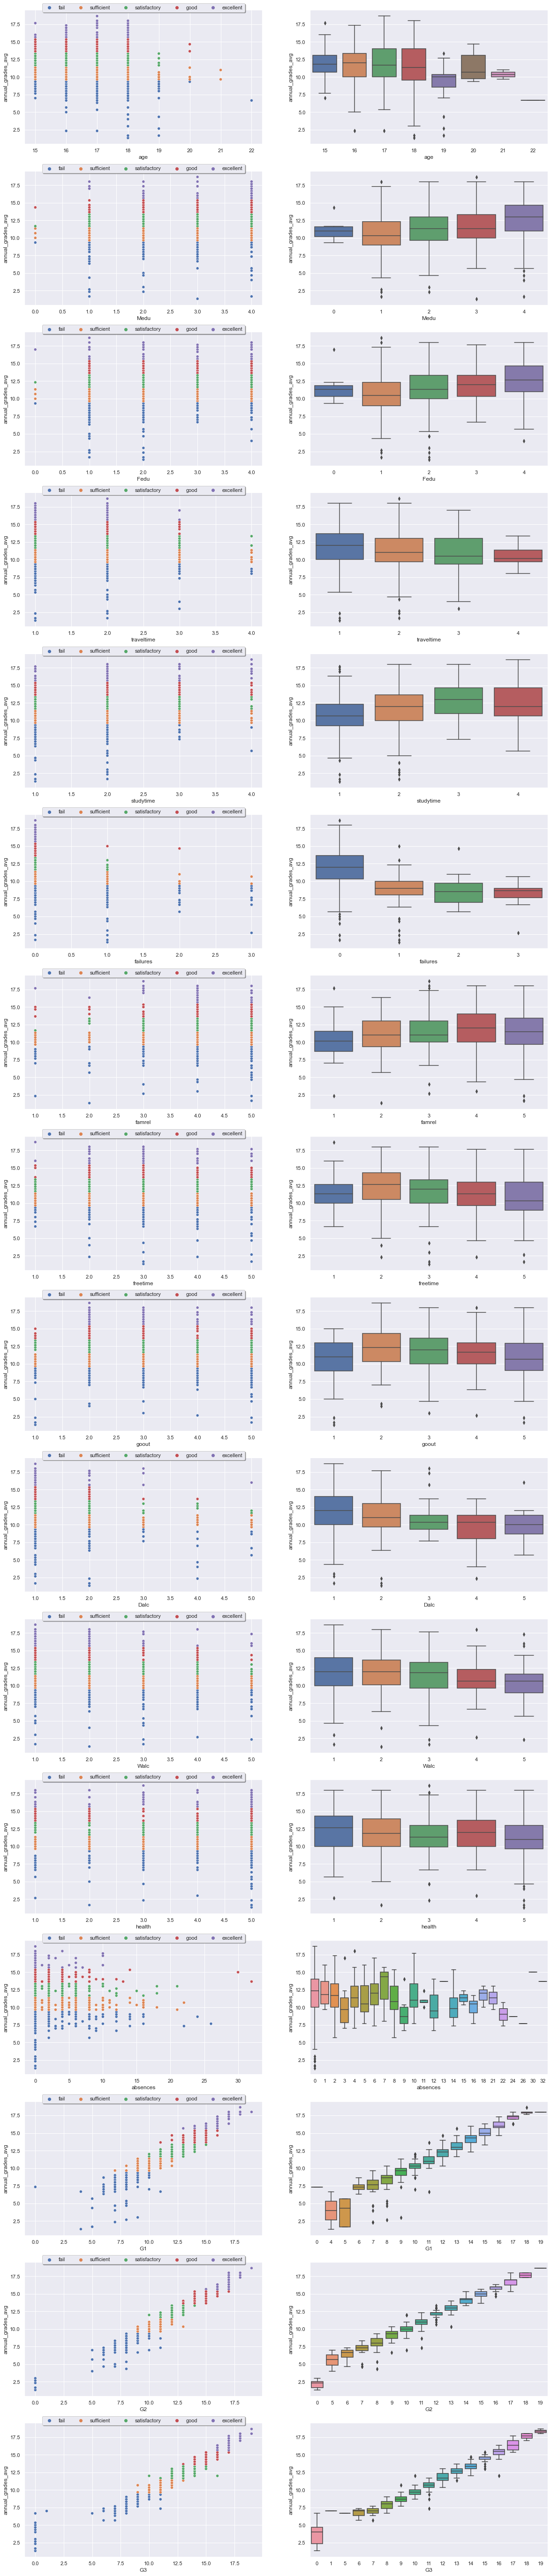

In [59]:
columns = data.select_dtypes(include=['int64', 'float64'])
columns = columns.drop('annual_grades_avg', axis=1)
plot_non_categorical_insight(columns)

In [61]:
def boxplot_non_categorical(non_categorical_columns, colors):
    nrows, ncols = 4, 4
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

    for idx, sliced_columns in enumerate(non_categorical_columns):
        ax = axes[idx]

        for col_idx, (column, color) in enumerate(zip(sliced_columns, colors)):
            sns.boxplot(data=data, x=column,
                        ax=ax[col_idx], color=color)

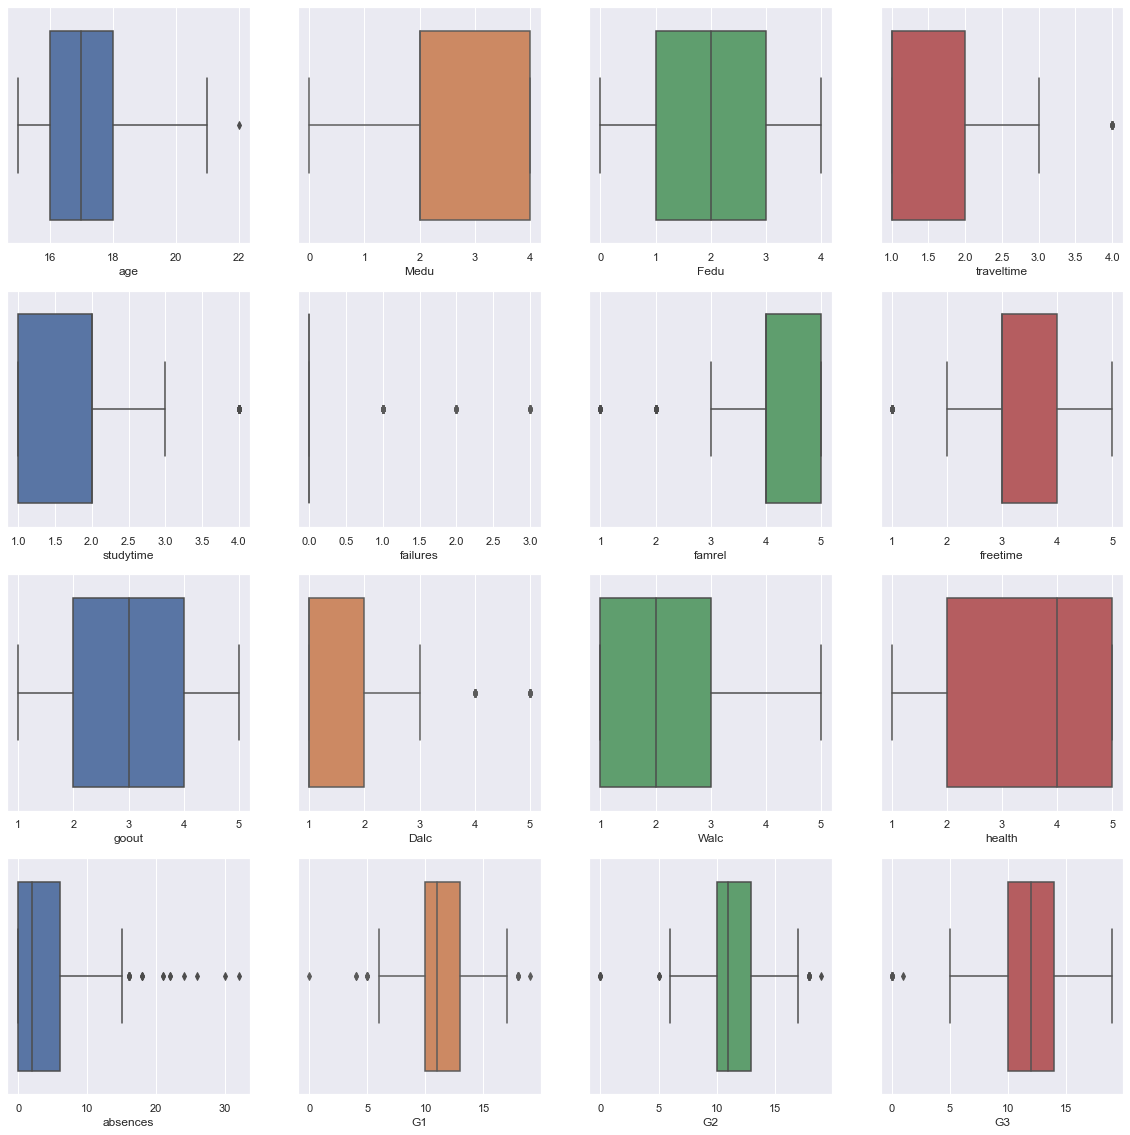

In [62]:
size = 4
sliced_columns = [column for column in columns]
sliced_columns = [sliced_columns[sliced-4:sliced]
                  for sliced in range(size, columns.shape[1] + 1, size)]

colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52']
boxplot_non_categorical(sliced_columns, colors)

In [64]:
data['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

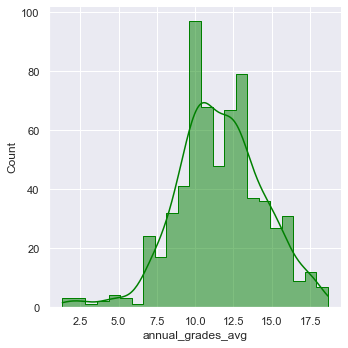

In [65]:
sns.displot(data=data['annual_grades_avg'],
            element='step', kde=True, color='green')

In [66]:
print(f"skewness: {data['annual_grades_avg'].skew()}")
print(f"kurtosis: {data['annual_grades_avg'].kurt()}")

skewness: -0.2264056260005791
kurtosis: 0.6043362956597256


In [68]:
column_to_drop = ['G1', 'G2', 'G3']
data = data.drop(column_to_drop, axis=1)

In [70]:
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (data[column] >= Q1 - 1.5 *
                IQR) & (data[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())
numerical_columns = ['age', 'absences', 'annual_grade']

In [71]:
numerical_columns = ['age', 'absences', 'annual_grades_avg']
outlier_indices = detect_outliers(numerical_columns)

In [72]:
print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 35


In [73]:
# Delete outliers
data = data.drop(outlier_indices, axis=0)

In [74]:
# Split dataset
X, y = data.iloc[:, :-1], data.iloc[:, -1]
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns
    return binary_columns, nominal_columns, numerical_columns

In [76]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()
# Now we can create a column transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

In [77]:
# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)

In [78]:
RANDOM_STATE = 42
# I did tweak some of the hyperparameters with trial & error
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [79]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes'
                     ]

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

In [80]:
def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [81]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [82]:
def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [83]:
best_estimators = pick_best_estimator()
    

In [85]:
def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    return scores

In [86]:
scores = gather_metrics_scores()
def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

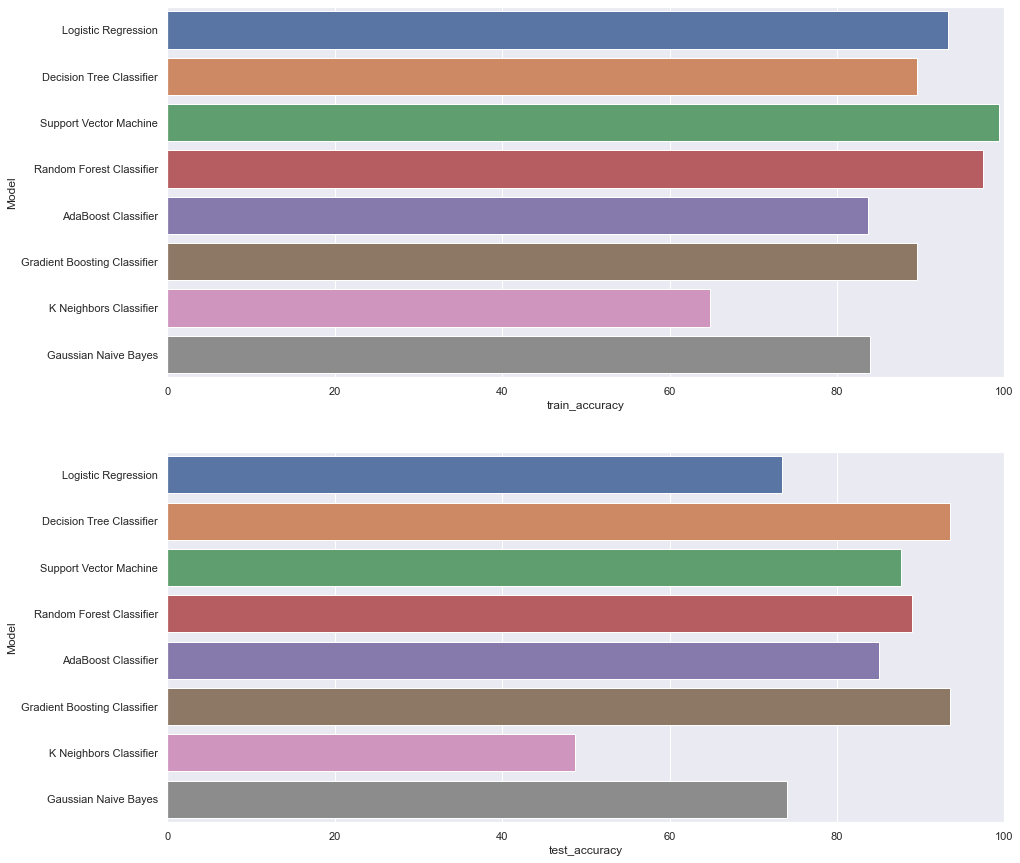

In [87]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})
plot_train_test_accuracy(results_df)